<a href="https://colab.research.google.com/github/pham156/pytorch-learning/blob/main/Pytorch_1_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # neural network
import matplotlib.pyplot as plt


In [ ]:
# Data (preparing and loading)

In [ ]:
weight, bias = 0.7, 0.3
start, end, step = 0, 1, 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + step

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (7,10))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14});

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias
  ...

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
# plot_predictions(predictions=y_preds)

In [ ]:
# loss func https://pytorch.org/docs/stable/nn.html#loss-functions
loss_fn = nn.L1Loss() # MAE
# opt https://pytorch.org/docs/stable/optim.html
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward() # compute parameter gradients, ect from loss

    # 5. Progress the optimizer
    optimizer.step() # use gradient, ect to optimize

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.07634089887142181 | MAE Test Loss: 0.20949964225292206 
Epoch: 10 | MAE Train Loss: 0.06788711249828339 | MAE Test Loss: 0.17518579959869385 
Epoch: 20 | MAE Train Loss: 0.06347592175006866 | MAE Test Loss: 0.15537849068641663 
Epoch: 30 | MAE Train Loss: 0.059870801866054535 | MAE Test Loss: 0.1430024355649948 
Epoch: 40 | MAE Train Loss: 0.05638080835342407 | MAE Test Loss: 0.13198237121105194 
Epoch: 50 | MAE Train Loss: 0.05292920023202896 | MAE Test Loss: 0.12302298843860626 
Epoch: 60 | MAE Train Loss: 0.049490392208099365 | MAE Test Loss: 0.11475052684545517 
Epoch: 70 | MAE Train Loss: 0.04605617746710777 | MAE Test Loss: 0.10716497898101807 
Epoch: 80 | MAE Train Loss: 0.04262556880712509 | MAE Test Loss: 0.09889253228902817 
Epoch: 90 | MAE Train Loss: 0.0391867570579052 | MAE Test Loss: 0.09062011539936066 


In [ ]:
import numpy as np


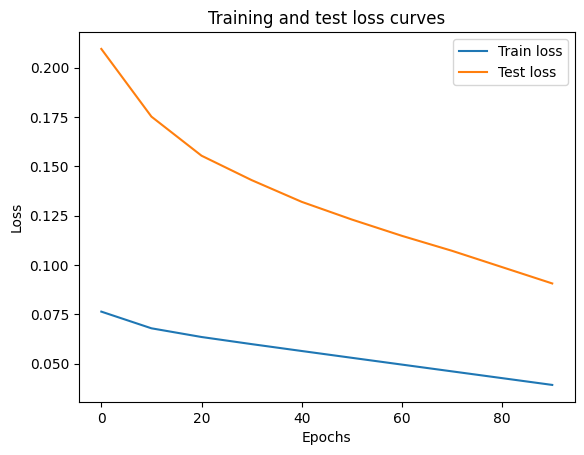

In [ ]:
# plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy), label="Train loss")
# plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy), label="Test loss")
# plt.title("Training and test loss curves")
# plt.ylabel("Loss")
# plt.xlabel("Epochs")
# plt.legend();
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# torch.save()
# torch.load()
# torch.nn.Module.load_state_dict()

## for google colab
# from pathlib import Path

# # 1. Create models directory
# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)

# # 2. Create model save path
# MODEL_NAME = "01_pytorch_workflow_model_0.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# # 3. Save the model state dict
# print(f"Saving model to: {MODEL_SAVE_PATH}")
# torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
#            f=MODEL_SAVE_PATH)

In [ ]:
## Load a mode
# load_model_0 = LinearRegressionModel()
# load_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# # Make prediction:
# loaded_model_0.eval()
# with torch.inference_mode():
#     loaded_model_preds = loaded_model_0(X_test)

In [ ]:
# Better Version

In [ ]:
weight, bias = 0.7, 0.3
start, end, step = 0, 1, 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + step

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# loss func https://pytorch.org/docs/stable/nn.html#loss-functions
loss_fn = nn.L1Loss() # MAE
# opt https://pytorch.org/docs/stable/optim.html
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# # Put data on the available device
# # Without this, error will happen (not all model/data on device)
# X_train = X_train.to(device)
# X_test = X_test.to(device)
# y_train = y_train.to(device)
# y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 100 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 200 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 300 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 400 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 500 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 600 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 700 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 800 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864
Epoch: 900 | Train loss: 0.835178017616272 | Test loss: 0.8674471974372864


In [ ]:
print(model_1.state_dict())
print(f"weights: {weight}, bias: {bias}")

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
weights: 0.7, bias: 0.3
